In [1]:
import pandas as pd
import numpy as np
import warnings
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('combined.csv')
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,54
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,54
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,54
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,54
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220016,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-05,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,07 TO 09,112.0,Improved,2016,1278000.0,91 years 09 months,91
220017,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-08,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,22 TO 24,112.0,Improved,2016,1325000.0,91 years 05 months,91
220018,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-12,BUKIT MERAH,5 ROOM,9B,BOON TIONG RD,19 TO 21,112.0,Improved,2016,1400000.0,91 years 02 months,91
220019,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2024-03,BUKIT MERAH,4 ROOM,9B,BOON TIONG RD,25 TO 27,92.0,Model A,2016,1188000.0,90 years 11 months,91


In [3]:
df.dtypes

df.isnull().sum()

latitude                0
longitude               0
blk_no                 15
road_name               0
postal_code             0
address                 0
cbd_dist                0
min_dist_mrt            0
month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
resale_price            0
remaining_lease         0
lease_remain_years      0
dtype: int64

In [4]:
def get_median(x):
    split_list = x.split(' TO ')
    float_list = [float(i) for i in split_list]
    median = statistics.median(float_list)
    return median

df['storey_median'] = df['storey_range'].apply(lambda x: get_median(x))
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,...,1,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,54,5.0
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,54,8.0
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,54,8.0
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,54,8.0
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,...,1,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220016,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-05,BUKIT MERAH,...,9B,BOON TIONG RD,07 TO 09,112.0,Improved,2016,1278000.0,91 years 09 months,91,8.0
220017,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-08,BUKIT MERAH,...,9B,BOON TIONG RD,22 TO 24,112.0,Improved,2016,1325000.0,91 years 05 months,91,23.0
220018,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-12,BUKIT MERAH,...,9B,BOON TIONG RD,19 TO 21,112.0,Improved,2016,1400000.0,91 years 02 months,91,20.0
220019,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2024-03,BUKIT MERAH,...,9B,BOON TIONG RD,25 TO 27,92.0,Model A,2016,1188000.0,90 years 11 months,91,26.0


In [5]:
df['storey_median_1'] = df['storey_range'].apply(get_median)
df

,latitude,longitude,blk_no,road_name,postal_code,address,cbd_dist,min_dist_mrt,month,town,...,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,lease_remain_years,storey_median,storey_median_1
0,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2015-01,KALLANG/WHAMPOA,...,BEACH RD,04 TO 06,74.0,Improved,1979,388000.0,63,54,5.0,5.0
1,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2016-03,KALLANG/WHAMPOA,...,BEACH RD,07 TO 09,68.0,Improved,1979,350000.0,62,54,8.0,8.0
2,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-04,KALLANG/WHAMPOA,...,BEACH RD,07 TO 09,68.0,Improved,1979,340000.0,61 years 05 months,54,8.0,8.0
3,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-05,KALLANG/WHAMPOA,...,BEACH RD,07 TO 09,68.0,Improved,1979,322000.0,61 years 05 months,54,8.0,8.0
4,1.303671,103.864479,1,BEACH ROAD,190001,1 BEACH RD,2715.822202,457.092359,2017-06,KALLANG/WHAMPOA,...,BEACH RD,07 TO 09,68.0,Improved,1979,370000.0,61 years 03 months,54,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220016,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-05,BUKIT MERAH,...,BOON TIONG RD,07 TO 09,112.0,Improved,2016,1278000.0,91 years 09 months,91,8.0,8.0
220017,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-08,BUKIT MERAH,...,BOON TIONG RD,22 TO 24,112.0,Improved,2016,1325000.0,91 years 05 months,91,23.0,23.0
220018,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2023-12,BUKIT MERAH,...,BOON TIONG RD,19 TO 21,112.0,Improved,2016,1400000.0,91 years 02 months,91,20.0,20.0
220019,1.286814,103.828928,9B,BOON TIONG ROAD,163009,9B BOON TIONG RD,2525.251132,182.864524,2024-03,BUKIT MERAH,...,BOON TIONG RD,25 TO 27,92.0,Model A,2016,1188000.0,90 years 11 months,91,26.0,26.0


In [6]:
scope_df = df[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']]
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,74.0,54,5.0,388000.0
1,2715.822202,457.092359,68.0,54,8.0,350000.0
2,2715.822202,457.092359,68.0,54,8.0,340000.0
3,2715.822202,457.092359,68.0,54,8.0,322000.0
4,2715.822202,457.092359,68.0,54,8.0,370000.0
...,...,...,...,...,...,...
220016,2525.251132,182.864524,112.0,91,8.0,1278000.0
220017,2525.251132,182.864524,112.0,91,23.0,1325000.0
220018,2525.251132,182.864524,112.0,91,20.0,1400000.0
220019,2525.251132,182.864524,92.0,91,26.0,1188000.0


In [7]:
scope_df = scope_df.drop_duplicates()
scope_df

,cbd_dist,min_dist_mrt,floor_area_sqm,lease_remain_years,storey_median,resale_price
0,2715.822202,457.092359,74.0,54,5.0,388000.0
1,2715.822202,457.092359,68.0,54,8.0,350000.0
2,2715.822202,457.092359,68.0,54,8.0,340000.0
3,2715.822202,457.092359,68.0,54,8.0,322000.0
4,2715.822202,457.092359,68.0,54,8.0,370000.0
...,...,...,...,...,...,...
220016,2525.251132,182.864524,112.0,91,8.0,1278000.0
220017,2525.251132,182.864524,112.0,91,23.0,1325000.0
220018,2525.251132,182.864524,112.0,91,20.0,1400000.0
220019,2525.251132,182.864524,92.0,91,26.0,1188000.0


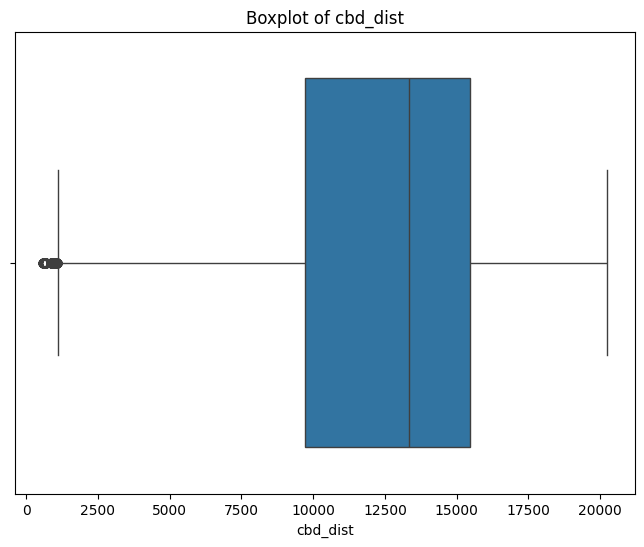

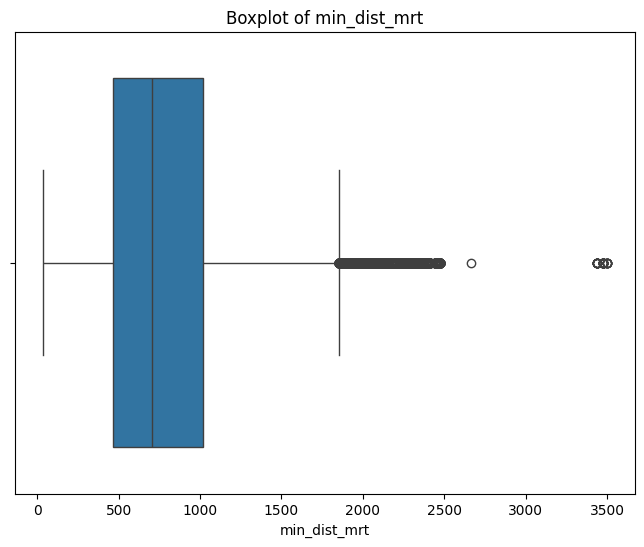

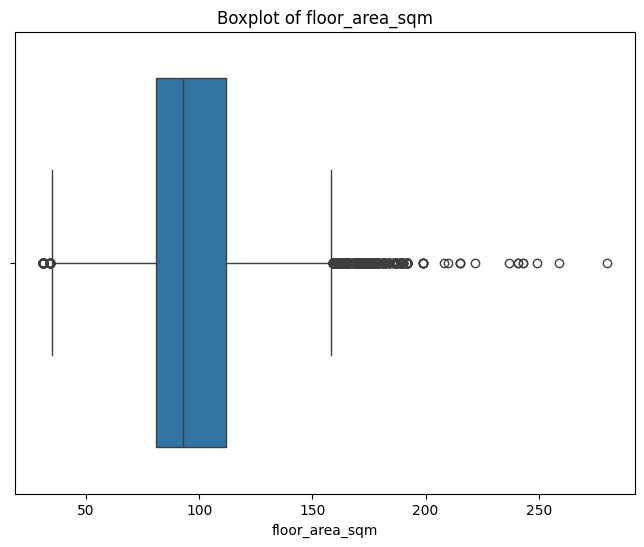

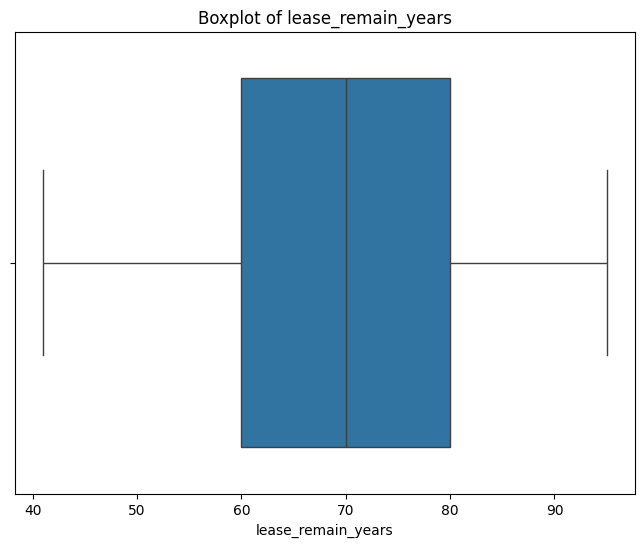

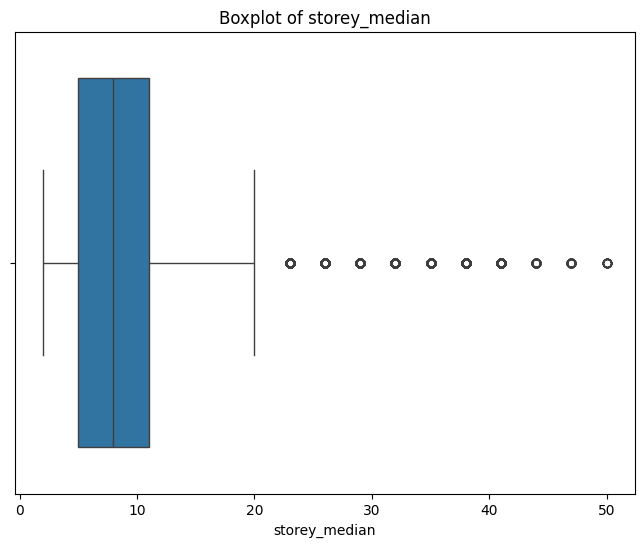

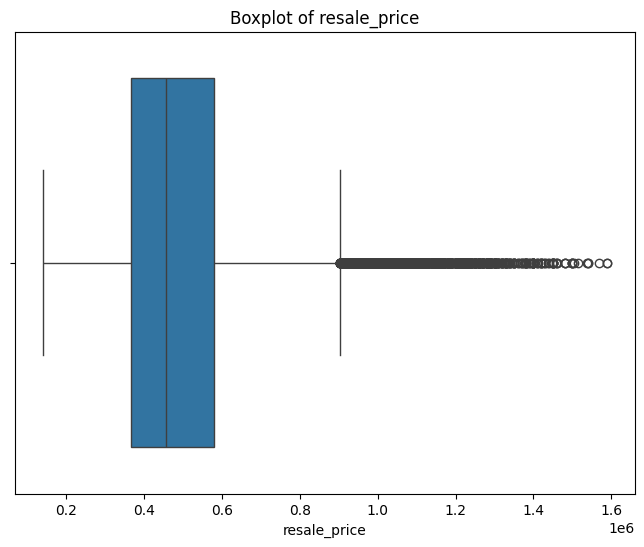

In [8]:
# List of columns(continuous variables) for finding skewness
col = ['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [9]:
df1 = scope_df

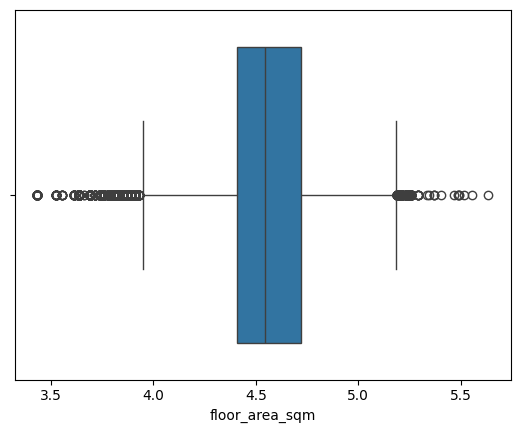

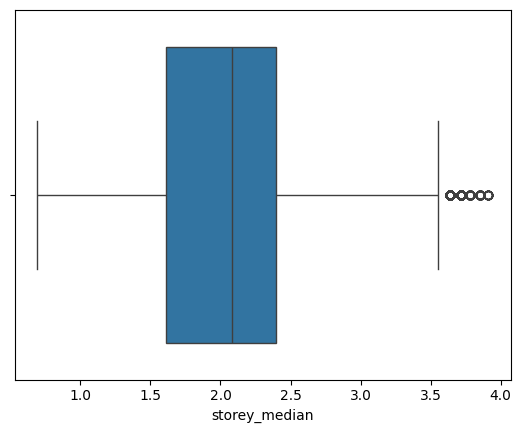

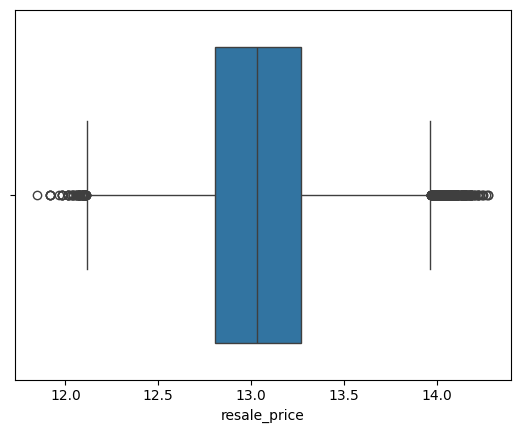

In [10]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df1['floor_area_sqm'] = np.log(df1['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df1)
plt.show()

df1['storey_median'] = np.log(df1['storey_median'])
sns.boxplot(x='storey_median', data=df1)
plt.show()

df1['resale_price'] = np.log(df1['resale_price'])
sns.boxplot(x='resale_price', data=df1)
plt.show()

# Correlation Heatmap

<Axes: title={'center': 'Correlation Heatmap'}>

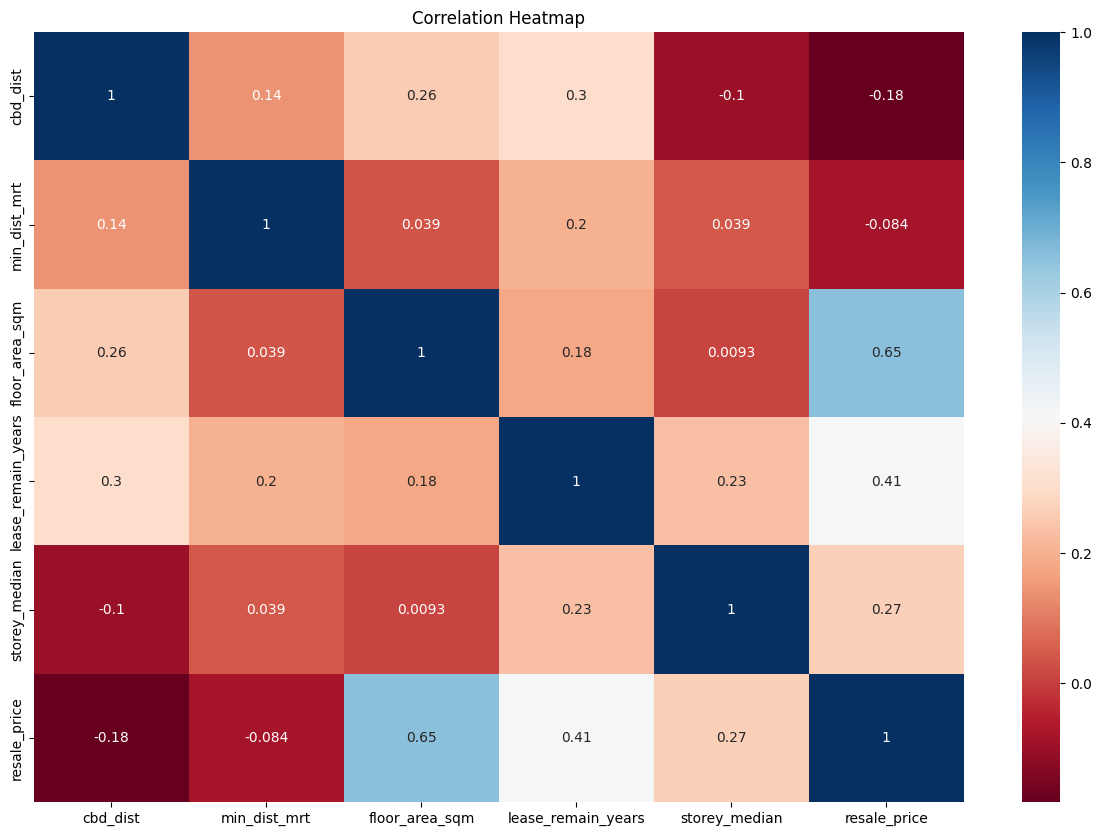

In [11]:
corrMatrix = df1.corr()
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [12]:
X=df1[['cbd_dist','min_dist_mrt','floor_area_sqm','lease_remain_years','storey_median']]
y=df1['resale_price']

# Normalizing the encoded data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
# Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Hyperparameters
param_grid = {
    'max_depth': [2, 5, 10,20],
    'min_samples_split': [2, 4, 7],
    'min_samples_leaf': [2, 5, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 4}


In [15]:
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

 
Mean squared error: 0.017208420759388214
Mean Absolute Error 0.1049006173063586
Root Mean squared error: 0.13118087040185475
 
R-squared: 0.8427586300535974


# Testing Our Trained Model

In [16]:

new_sample = np.array([[8740, 999, np.log(44), 55, np.log(11)]])
new_sample = scaler.transform(new_sample[:, :5])
new_pred = best_model.predict(new_sample)[0]
np.exp(new_pred)

239633.27473366846

In [17]:
# Saving the model
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [18]:
%%writefile Singapore_App.py

import streamlit as st
from streamlit_option_menu import option_menu
import json
import requests
import pandas as pd
from geopy.distance import geodesic
import statistics
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# ----------------------------------------Functions---------------------------------------------------------
# To get mrt_df
def get_mrt_df():
    df = pd.read_csv('mrt.csv').reset_index(drop= True)
    return df

# To load pickles
def load_pickles():
    with open(r"model.pkl", 'rb') as file:
        loaded_model = pickle.load(file)
    with open(r'scaler.pkl', 'rb') as f:
        scaler_loaded = pickle.load(f)
    return loaded_model, scaler_loaded
# Pre_processing input    
def preprocessing_input(street_name,block,lease_commence_year,storey_range):
    # -----Calculating lease_remain_years using lease_commence_year-----
    lease_remain_years = 99 - (2023 - lease_commence_year)

    # -----Calculating median of storey_range to make our calculations quite comfortable-----
    split_list = storey_range.split(' TO ')
    float_list = [float(i) for i in split_list]
    storey_median = statistics.median(float_list)
    min_dist_mrt, cbd_dist = get_min_distance_from_MRT_CBD(block,street_name)
    return storey_median,lease_remain_years, min_dist_mrt, cbd_dist

def get_min_distance_from_MRT_CBD(block,street_name):

    # Getting the address by joining the block number and the street name
    addrs = block + " " + street_name
    url = "https://www.onemap.gov.sg/api/common/elastic/search?searchVal="+str(addrs)+"&returnGeom=Y&getAddrDetails=Y&pageNum=1"
    resp = requests.get(url)

    # Using OpenMap API getting the latitude and longitude location of that address
    origin = []
    data_geo_location = json.loads(resp.content)
    if data_geo_location['found'] != 0:
            latitude = data_geo_location['results'][0]['LATITUDE']
            longitude = data_geo_location['results'][0]['LONGITUDE']
            origin.append((latitude, longitude))
    else:
        st.warning('Location Not found')
        return None

    # Appending the Latitudes and Longitudes of the MRT Stations
    # Latitudes and Longitudes are been appended in the form of a tuple to that list
    mrt_location = get_mrt_df()
    mrt_lat = mrt_location['latitude']
    mrt_long = mrt_location['longitude']
    list_of_mrt_coordinates = []
    for lat, long in zip(mrt_lat, mrt_long):
        list_of_mrt_coordinates.append((lat, long))

    # Getting distance to nearest MRT Stations (Mass Rapid Transit System)
    list_of_dist_mrt = []
    for destination in range(0, len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(geodesic(origin, list_of_mrt_coordinates[destination]).meters)
    min_dist_mrt = min(list_of_dist_mrt)

    # Getting distance from CBD (Central Business District)
    cbd_dist = geodesic(origin, (1.2830, 103.8513)).meters  # CBD coordinates\
    
    return min_dist_mrt,cbd_dist


# -------------------------------This is the configuration page for our Streamlit Application---------------------------
st.set_page_config(
    page_title="Singapore Resale Flat Prices Prediction",
    page_icon="🏨",
    layout="wide"
)

# -------------------------------This is the sidebar in a Streamlit application, helps in navigation--------------------
with st.sidebar:
    selected = option_menu("Main Menu", ["About Project", "Predictions"],
                           icons=["house", "gear"],
                           styles={"nav-link": {"font": "sans serif", "font-size": "20px", "text-align": "centre"},
                                   "nav-link-selected": {"font": "sans serif", "background-color": "#0072b1"},
                                   "icon": {"font-size": "20px"}
                                   }
                           )

# -----------------------------------------------About Project Section--------------------------------------------------
if selected == "About Project":
    st.markdown("# :blue[Singapore Resale Flat Prices Prediction]")
    st.markdown('<div style="height: 50px;"></div>', unsafe_allow_html=True)
    st.markdown("### :blue[Technologies :] Python, Pandas, Numpy, Scikit-Learn, Streamlit, Python scripting, "
                "Machine Learning, Data Preprocessing, Visualization, EDA, Model Building, Data Wrangling, "
                "Model Deployment")
    st.markdown("### :blue[Overview :] This project aims to construct a machine learning model and implement "
                "it as a user-friendly online application in order to provide accurate predictions about the "
                "resale values of apartments in Singapore. This prediction model will be based on past transactions "
                "involving resale flats, and its goal is to aid both future buyers and sellers in evaluating the "
                "worth of a flat after it has been previously resold. Resale prices are influenced by a wide variety "
                "of criteria, including location, the kind of apartment, the total square footage, and the length "
                "of the lease. The provision of customers with an expected resale price based on these criteria is "
                "one of the ways in which a predictive model may assist in the overcoming of these obstacles.")
    st.markdown("### :blue[Domain :] Real Estate")

# ------------------------------------------------Predictions Section---------------------------------------------------
if selected == "Predictions":
    st.markdown("# :blue[Predicting Results based on Trained Models]")
    st.markdown("### :orange[Predicting Resale Price (Regression Task) (Accuracy: 87%)]")
    
    
    with st.form("form1"):
    
    # -----New Data inputs from the user for predicting the resale price-----
        st.write( f'<h5 style="color:rgb(0, 153, 153,0.4);">NOTE: Min & Max given for reference, you can enter any value</h5>', unsafe_allow_html=True )
        street_name = st.text_input("Street Name")
        block = st.text_input("Block Number")
        floor_area_sqm = st.number_input('Floor Area (Per Square Meter) (min_value=30.0, max_value=300.0)', )
        lease_commence_year = st.number_input('Lease Commence Year (min_value = 1966, max_value=2024)')
        storey_range = st.text_input("Storey Range (Format: 'Value1' TO 'Value2')")

        # -----Submit Button for PREDICT RESALE PRICE-----

        submit_button = st.form_submit_button(label="PREDICT RESALE PRICE")

        if submit_button:
            try: 
                loaded_model, scaler_loaded  = load_pickles()
                storey_median,lease_remain_years, min_dist_mrt, cbd_dist = preprocessing_input(street_name,block,lease_commence_year,storey_range)

                # -----Sending the user enter values for prediction to our model-----
                new_sample = np.array(
                    [[cbd_dist, min_dist_mrt, np.log(floor_area_sqm), lease_remain_years, np.log(storey_median)]])
                new_sample = scaler_loaded.transform(new_sample[:, :5])
                new_pred = loaded_model.predict(new_sample)[0]
                st.write('## :green[Predicted resale price:] ', np.floor(np.exp(new_pred)),':green[$]' )
            except Exception as err:
                st.warning("Please fill the form with Valid Details")




Writing Singapore_App.py
